In [8]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import from_binary_to_int
plt.rcParams['font.size'] = '10'
# plt.rcParams["font.family"] = "Times New Roman"

def plot_bar(penguin_means, penguin_std, lim_sup = 1.05, title='Normalized Performance for Warren Truss with 5 Nodes', yl ='Normalized Performance', div=2, filename="asd"):
    
    species = ("P=1", "P=4", "P=16", "P=64")
    x = np.arange(len(species))  # the label locations
    multiplier = 0
    width=0.3
    fig, ax = plt.subplots(layout='constrained', figsize=(5,5))

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, yerr = penguin_std[attribute], label=attribute, capsize=3)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(yl)
    ax.set_title(title)
    ax.set_xticks(x + width/div, species)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, lim_sup)
    fig.savefig(f'figures/{filename}.svg', bbox_inches = "tight")
    plt.show()





In [9]:
case= 11
N_S = 2 if case==5 else 4
print(N_S)

with open(f"results/optimization_WarrenTruss_{case}_trad_SGD.pickle", 'rb') as f:
    wt_trad = pickle.load(f)
    
with open(f"results/optimization_WarrenTruss_{case}_xy_SGD.pickle", 'rb') as f:
    wt_xy = pickle.load(f)

print(f"Dictionary keys: {wt_trad.keys()}")
df = wt_trad["df_exact_solution"]

# _ = compute_score(wt_trad["results"][f"SGD_64"][0][2], df, N_S, verbose=True)

df["fulfills"] = df["Candidate Solutions"].apply(lambda x: sum(x)==N_S)
df_ = df[df.fulfills].copy()
best_value = df_.f_obj.max()
worst_value = df_.f_obj.min()

best_solution = df["Candidate Solutions"].head(1).item()
print(f"best_solution: {best_solution}")
print(f"best value: {best_value}")
print(f"worst_value: {worst_value}")

total_solutions = df.fulfills.sum()
print(f"Total solutions: {total_solutions}")
best_percentage = 0.1
filtered_df = df_.head(int(total_solutions * best_percentage))
# display(filtered_df)
high_solutions = filtered_df["Candidate Solutions"].tolist()
print(f"High solutions: {high_solutions}")
print(len(high_solutions))




4
Dictionary keys: dict_keys(['results', 'circuit_depths', 'df_exact_solution'])
best_solution: (0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0)
best value: 16.246230868904576
worst_value: 16.059861165220987
Total solutions: 3060
High solutions: [(0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0), (0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1), (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0), (0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1), (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0), (0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1, 

[[0.11703557187840123, 0.004893997388650168], [0.03086634825901796, 0.0029309767380023524], [0.3254811484955732, 0.007561203775973915], [0.15479694335364727, 0.007249709830155304]]
[[0.4284923451563949, 0.002663675034645474], [0.4716379840403867, 0.005123979718127566], [0.4324928859632175, 0.004322762900977034], [0.486215148448898, 0.006484843427231755]]


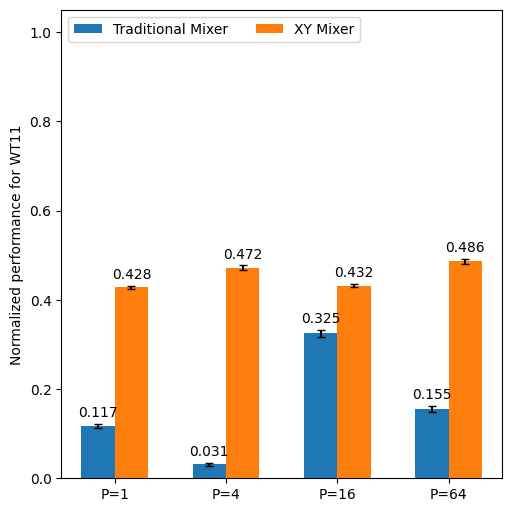

In [10]:
# First Plot
scores_trad = [[wt_trad["results"][f"SGD_{j}"][i][4] for i in range(5)] for j in [1,4,16,64]]
scores_trad = [[np.mean(np.asarray(scores_trad[k])), np.std(np.asarray(scores_trad[k]))] for k in range(4)]

scores_xy = [[wt_xy["results"][f"SGD_{j}"][i][4] for i in range(5)] for j in [1,4,16,64]]
scores_xy = [[np.mean(np.asarray(scores_xy[k])), np.std(np.asarray(scores_xy[k]))] for k in range(4)]


print(scores_trad)
print(scores_xy)


means = {'Traditional Mixer': [round(scores_trad[k][0], 3) for k in range(4)],
    'XY Mixer': [round(scores_xy[k][0], 3) for k in range(4)]}

std = {'Traditional Mixer': [round(scores_trad[k][1], 3) for k in range(4)],
    'XY Mixer': [round(scores_xy[k][1], 3) for k in range(4)]}



plot_bar(means, std, lim_sup = 1.05, title="", filename="WT11_OPT_norm_perf", yl="Normalized performance for WT11")

[[0.633203125, 0.011093337360283536], [0.9076171875, 0.009235617513700695], [0.156640625, 0.011213046948755722], [0.2578125, 0.013232331785901814]]
[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


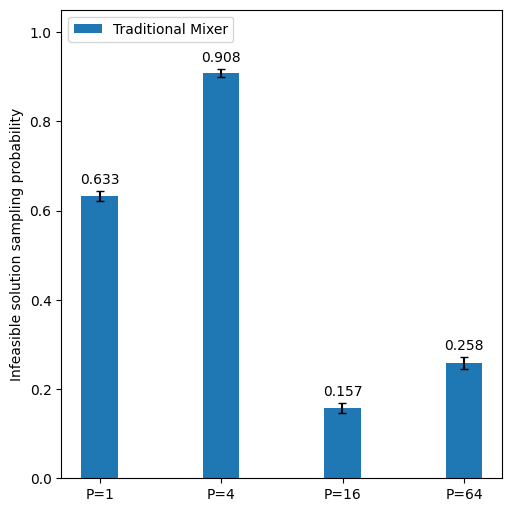

In [11]:
# Second plot: Probability of sampling infeasible
infeasible = [from_binary_to_int(np.asarray(x)) for x in df["Candidate Solutions"].tolist() if sum(x) != N_S]

probs_infeasible_trad = [[wt_trad["results"][f"SGD_{j}"][i][2] for i in range(5)] for j in [1,4,16,64]]
probs_infeasible_trad = [[sum(probs_infeasible_trad[i][j][infeasible]) for j in range(5)] for i in range(4)]
probs_infeasible_trad = [[np.mean(np.asarray(probs_infeasible_trad[k])), np.std(np.asarray(probs_infeasible_trad[k]))] for k in range(4)]

probs_infeasible_xy = [[wt_xy["results"][f"SGD_{j}"][i][2] for i in range(5)] for j in [1,4,16,64]]
probs_infeasible_xy = [[sum(probs_infeasible_xy[i][j][infeasible]) for j in range(5)] for i in range(4)]
probs_infeasible_xy = [[np.mean(np.asarray(probs_infeasible_xy[k])), np.std(np.asarray(probs_infeasible_xy[k]))] for k in range(4)]

print(probs_infeasible_trad)
print(probs_infeasible_xy)

means = {'Traditional Mixer': [round(probs_infeasible_trad[k][0], 3) for k in range(4)]}
std = {'Traditional Mixer': [round(probs_infeasible_trad[k][1], 3) for k in range(4)]}

plot_bar(means, std, lim_sup = 1.05, div=100, title="", yl="Infeasible solution sampling probability")

20500
[[0.0, 0.0], [0.0, 0.0], [0.0009765625, 0.0010697706201272775], [0.000390625, 0.00078125]]
[[0.0, 0.0], [0.0, 0.0], [0.000390625, 0.0004784159653873395], [0.0, 0.0]]


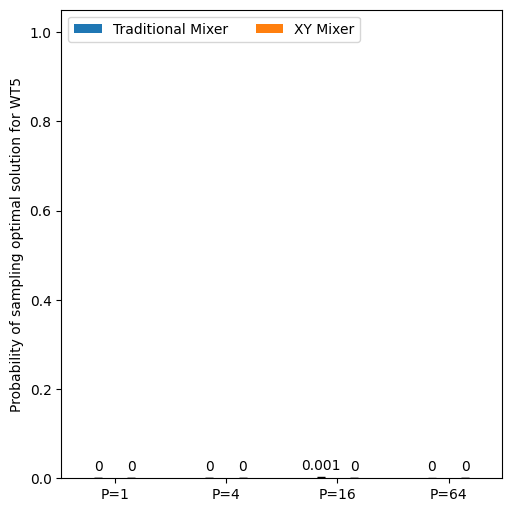

In [12]:
# Third plot: Probability of sampling best solution
best_index = from_binary_to_int(np.asarray(best_solution))
print(best_index)
probs_best_trad = [[wt_trad["results"][f"SGD_{j}"][i][2] for i in range(5)] for j in [1,4,16,64]]
probs_best_trad = [[probs_best_trad[i][j][best_index] for j in range(5)] for i in range(4)]
probs_best_trad = [[np.mean(np.asarray(probs_best_trad[k])), np.std(np.asarray(probs_best_trad[k]))] for k in range(4)]

probs_best_xy = [[wt_xy["results"][f"SGD_{j}"][i][2] for i in range(5)] for j in [1,4,16,64]]
probs_best_xy = [[probs_best_xy[i][j][best_index] for j in range(5)] for i in range(4)]
probs_best_xy = [[np.mean(np.asarray(probs_best_xy[k])), np.std(np.asarray(probs_best_xy[k]))] for k in range(4)]

print(probs_best_trad)
print(probs_best_xy)

means = {'Traditional Mixer': [round(probs_best_trad[k][0], 3) for k in range(4)],
         'XY Mixer':  [round(probs_best_xy[k][0], 3) for k in range(4)]}
std = {'Traditional Mixer': [round(probs_best_trad[k][1], 3) for k in range(4)],
         'XY Mixer':  [round(probs_best_xy[k][1], 3) for k in range(4)]}
plot_bar(means, std, lim_sup = 1.05, title="", yl="Probability of sampling optimal solution for WT5", filename="WT5_OPT_BEST")

[20500, 340, 21760, 87040, 85, 16468, 21508, 116, 29696, 20485, 16405, 81940, 86020, 21520, 4180, 20560, 5140, 86, 152576, 1108, 21568, 212, 23552, 22016, 596, 5440, 1360, 92, 54272, 21505, 65620, 4117, 86032, 20800, 1300, 23, 217088, 1045, 86080, 21632, 2132, 8276, 21536, 20486, 147476, 16406, 151556, 94208, 53, 131156, 21506, 20548, 17428, 159744, 54, 149, 88064, 24596, 20516, 16436, 28676, 29, 118784, 22532, 16532, 81925, 21512, 32852, 5380, 16720, 82000, 5125, 277, 86272, 5200, 16660, 20740, 65557, 86017, 17728, 1348, 53252, 16412, 86144, 2069, 8213, 86048, 131093, 86018, 533, 86528, 18452, 20612, 4118, 151568, 7424, 464, 16916, 20996, 151616, 1046, 4148, 28688, 32789, 86024, 180, 30720, 1076, 28736, 20624, 6164, 4244, 22544, 404, 22784, 153600, 150, 325, 1285, 83200, 82240, 4432, 5392, 156, 55296, 20492, 49172, 22592, 1172, 2196, 22656, 9236, 20576, 564, 29184, 16708, 17668, 147461, 16391, 212996, 81926, 1556, 21056, 17413, 16453, 81988, 82948, 20752, 4372, 39, 221184, 1856, 14753

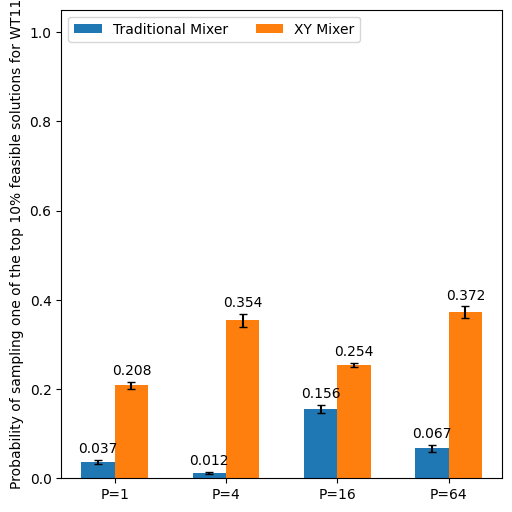

In [13]:
# Fourth plot: Probability of sampling x% best solutions
best_index = [from_binary_to_int(np.asarray(x)) for x in high_solutions]
print(best_index)
probs_best_trad = [[wt_trad["results"][f"SGD_{j}"][i][2] for i in range(5)] for j in [1,4,16,64]]
probs_best_trad = [[sum(probs_best_trad[i][j][best_index]) for j in range(5)] for i in range(4)]
probs_best_trad = [[np.mean(np.asarray(probs_best_trad[k])), np.std(np.asarray(probs_best_trad[k]))] for k in range(4)]

probs_best_xy = [[wt_xy["results"][f"SGD_{j}"][i][2] for i in range(5)] for j in [1,4,16,64]]
probs_best_xy = [[sum(probs_best_xy[i][j][best_index]) for j in range(5)] for i in range(4)]
probs_best_xy = [[np.mean(np.asarray(probs_best_xy[k])), np.std(np.asarray(probs_best_xy[k]))] for k in range(4)]

print(probs_best_trad)
print(probs_best_xy)

means = {'Traditional Mixer': [round(probs_best_trad[k][0], 3) for k in range(4)],
         'XY Mixer':  [round(probs_best_xy[k][0], 3) for k in range(4)]}
std = {'Traditional Mixer': [round(probs_best_trad[k][1], 3) for k in range(4)],
         'XY Mixer':  [round(probs_best_xy[k][1], 3) for k in range(4)]}
plot_bar(means, std, lim_sup = 1.05, title="", yl=f"Probability of sampling one of the top {str(int(best_percentage*100))}% feasible solutions for WT11", filename=f"WT11_TOP_BEST_{str(int(best_percentage*100))}")